In [2]:
#Predictions of future prices using Time series machine learning model by Vinayak Bhosale

In [3]:
#importing the necessary libraries

In [1]:
import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/into-the-future/train.csv
/kaggle/input/into-the-future/test.csv


In [4]:
#reading the data set

In [2]:
df1 = pd.read_csv("/kaggle/input/into-the-future/train.csv")
df1.head()

,id,time,feature_1,feature_2
0,0,2019-03-19 00:00:00,735.740043,54479.540513
1,1,2019-03-19 00:00:10,734.102947,47888.033714
2,2,2019-03-19 00:00:20,730.060336,47700.882325
3,3,2019-03-19 00:00:30,725.609742,47790.094648
4,4,2019-03-19 00:00:40,724.328480,47808.402381


In [5]:
#reading the test data set

In [3]:
df2 = pd.read_csv("/kaggle/input/into-the-future/test.csv")
df2.head()

,id,time,feature_1
0,564,2019-03-19 01:34:00,423.064004
1,565,2019-03-19 01:34:10,423.342749
2,566,2019-03-19 01:34:20,423.181186
3,567,2019-03-19 01:34:30,421.275243
4,568,2019-03-19 01:34:40,422.208444


In [6]:
#checking the shape

In [4]:
df1.shape

(564, 4)

In [5]:
df2.shape

(375, 3)

In [7]:
#checking the info of train data set

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         564 non-null    int64  
 1   time       564 non-null    object 
 2   feature_1  564 non-null    float64
 3   feature_2  564 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 17.8+ KB


In [8]:
#calling describe method on test data set to check mean, std, count etc

In [7]:
df1.describe()

,id,feature_1,feature_2
count,564.00000,564.000000,564.000000
mean,281.50000,523.754885,52487.426941
std,162.95705,70.507377,1582.206650
min,0.00000,420.127639,47700.882325
25%,140.75000,474.970260,51842.916087
50%,281.50000,501.204656,53170.608346
75%,422.25000,569.862105,53515.111143
max,563.00000,735.740043,54479.540513


In [9]:
#importing the visualization libraries

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#plotting time vs feature 1

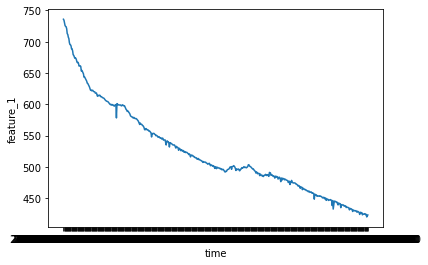

In [10]:
plt.plot(df1["time"],df1["feature_1"])
plt.xlabel("time")
plt.ylabel("feature_1")
plt.show()

In [11]:
#plotting time vs feature 2

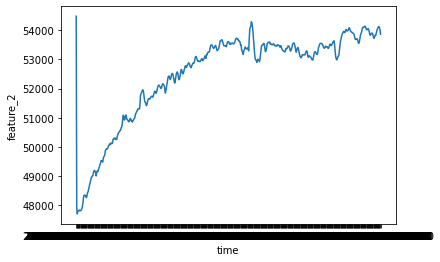

In [11]:
plt.plot(df1["time"],df1["feature_2"])
plt.xlabel("time")
plt.ylabel("feature_2")
plt.show()

In [12]:
#plotting feature1 vs feature2

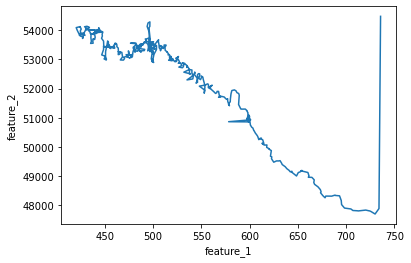

In [12]:
plt.plot(df1["feature_1"],df1["feature_2"])
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()

In [13]:
df1.head()

,id,time,feature_1,feature_2
0,0,2019-03-19 00:00:00,735.740043,54479.540513
1,1,2019-03-19 00:00:10,734.102947,47888.033714
2,2,2019-03-19 00:00:20,730.060336,47700.882325
3,3,2019-03-19 00:00:30,725.609742,47790.094648
4,4,2019-03-19 00:00:40,724.328480,47808.402381


In [13]:
#dropping the id column because we already have index

In [14]:
df1.drop("id",axis=1,inplace=True)
df1.head()

,time,feature_1,feature_2
0,2019-03-19 00:00:00,735.740043,54479.540513
1,2019-03-19 00:00:10,734.102947,47888.033714
2,2019-03-19 00:00:20,730.060336,47700.882325
3,2019-03-19 00:00:30,725.609742,47790.094648
4,2019-03-19 00:00:40,724.328480,47808.402381


In [14]:
#renaming the columns because facebook's prophet library needs it to be in a specific manner

In [15]:
df1.rename(columns={"time":"ds","feature_1":"add1","feature_2":"y"},inplace=True)
df1.head()

,ds,add1,y
0,2019-03-19 00:00:00,735.740043,54479.540513
1,2019-03-19 00:00:10,734.102947,47888.033714
2,2019-03-19 00:00:20,730.060336,47700.882325
3,2019-03-19 00:00:30,725.609742,47790.094648
4,2019-03-19 00:00:40,724.328480,47808.402381


In [16]:
df1["ds"] = pd.to_datetime(df1["ds"])
df1.head()

,ds,add1,y
0,2019-03-19 00:00:00,735.740043,54479.540513
1,2019-03-19 00:00:10,734.102947,47888.033714
2,2019-03-19 00:00:20,730.060336,47700.882325
3,2019-03-19 00:00:30,725.609742,47790.094648
4,2019-03-19 00:00:40,724.328480,47808.402381


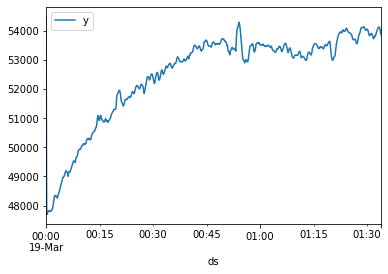

In [41]:
df1.plot(x="ds",y="y")

In [15]:
#checking the information of the data frame

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      564 non-null    datetime64[ns]
 1   add1    564 non-null    float64       
 2   y       564 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 13.3 KB


In [16]:
#importing the facebook's prophet library for model building

In [18]:
from fbprophet import Prophet

In [17]:
#training the model

In [20]:
m = Prophet()
m.fit(df1)

In [18]:
#checking the head of the test data set

In [21]:
df2.head()

,id,time,feature_1
0,564,2019-03-19 01:34:00,423.064004
1,565,2019-03-19 01:34:10,423.342749
2,566,2019-03-19 01:34:20,423.181186
3,567,2019-03-19 01:34:30,421.275243
4,568,2019-03-19 01:34:40,422.208444


In [19]:
#dropping the id column because we already have the index

In [22]:
df2.drop("id",axis=1,inplace=True)
df2.head()

,time,feature_1
0,2019-03-19 01:34:00,423.064004
1,2019-03-19 01:34:10,423.342749
2,2019-03-19 01:34:20,423.181186
3,2019-03-19 01:34:30,421.275243
4,2019-03-19 01:34:40,422.208444


In [20]:
#renaming the columns 

In [23]:
df2.rename(columns={"time":"ds","feature_1":"add1"},inplace=True)
df2.head()

,ds,add1
0,2019-03-19 01:34:00,423.064004
1,2019-03-19 01:34:10,423.342749
2,2019-03-19 01:34:20,423.181186
3,2019-03-19 01:34:30,421.275243
4,2019-03-19 01:34:40,422.208444


In [21]:
#converting the ds column to date and time stamp

In [24]:
df2["ds"] = pd.to_datetime(df2["ds"])
df2.head()

,ds,add1
0,2019-03-19 01:34:00,423.064004
1,2019-03-19 01:34:10,423.342749
2,2019-03-19 01:34:20,423.181186
3,2019-03-19 01:34:30,421.275243
4,2019-03-19 01:34:40,422.208444


In [22]:
#checking the infomation of the test data set

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      375 non-null    datetime64[ns]
 1   add1    375 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.0 KB


In [23]:
#making the predictions of the test data set

In [26]:
forecast = m.predict(df2)

In [27]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-19 01:34:00,54111.363742,53689.027243,54513.249634,54111.363742,54111.363742,0.0,0.0,0.0,0.0,0.0,0.0,54111.363742
1,2019-03-19 01:34:10,54118.150025,53707.823328,54525.875723,54118.150025,54118.150025,0.0,0.0,0.0,0.0,0.0,0.0,54118.150025
2,2019-03-19 01:34:20,54124.936308,53704.300073,54547.998044,54124.936308,54124.936308,0.0,0.0,0.0,0.0,0.0,0.0,54124.936308
3,2019-03-19 01:34:30,54131.722591,53714.618739,54565.690904,54131.722591,54131.722591,0.0,0.0,0.0,0.0,0.0,0.0,54131.722591
4,2019-03-19 01:34:40,54138.508874,53710.989372,54562.868975,54138.508874,54138.508874,0.0,0.0,0.0,0.0,0.0,0.0,54138.508874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2019-03-19 02:35:40,56622.288416,52083.868487,61113.014557,52130.058271,60958.417699,0.0,0.0,0.0,0.0,0.0,0.0,56622.288416
371,2019-03-19 02:35:50,56629.074699,52114.909267,61116.564205,52128.158927,60978.842460,0.0,0.0,0.0,0.0,0.0,0.0,56629.074699
372,2019-03-19 02:36:00,56635.860982,52013.222852,61171.951847,52126.259583,60999.267221,0.0,0.0,0.0,0.0,0.0,0.0,56635.860982
373,2019-03-19 02:36:10,56642.647265,52083.983623,61044.212498,52108.137302,61019.691983,0.0,0.0,0.0,0.0,0.0,0.0,56642.647265


In [24]:
#as we can see forcast has lot of infomation but we are only intrested in 'ds','yhat_lower', 'yhat_upper','yhat'
# these columns

In [28]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [25]:
#grabbing the 'ds','yhat_lower', 'yhat_upper','yhat' from forecast

In [29]:
forecast[['ds','yhat_lower', 'yhat_upper','yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
363,2019-03-19 02:34:30,52196.388371,60993.693916,56574.784436
364,2019-03-19 02:34:40,52121.138667,60908.214054,56581.570719
365,2019-03-19 02:34:50,52070.109997,60932.333345,56588.357002
366,2019-03-19 02:35:00,52070.787932,60915.593468,56595.143285
367,2019-03-19 02:35:10,52017.558882,60927.781162,56601.929568
368,2019-03-19 02:35:20,52007.158625,60988.341441,56608.715851
369,2019-03-19 02:35:30,52104.373089,60965.972747,56615.502133
370,2019-03-19 02:35:40,52083.868487,61113.014557,56622.288416
371,2019-03-19 02:35:50,52114.909267,61116.564205,56629.074699
372,2019-03-19 02:36:00,52013.222852,61171.951847,56635.860982


In [26]:
#plotting the forecast

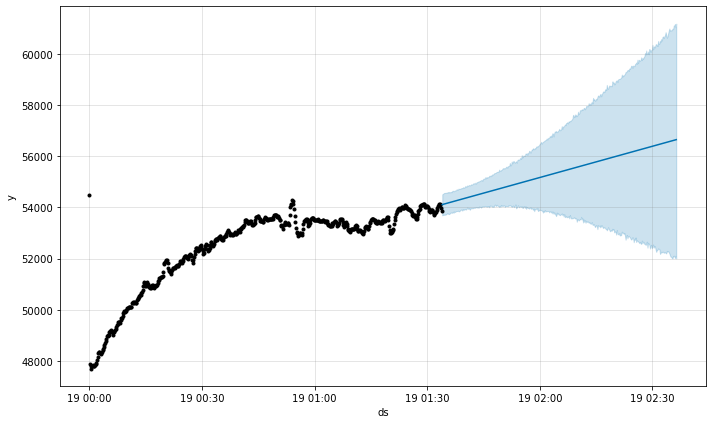

In [33]:
%matplotlib inline
m.plot(forecast);

In [27]:
#plotting the predictions

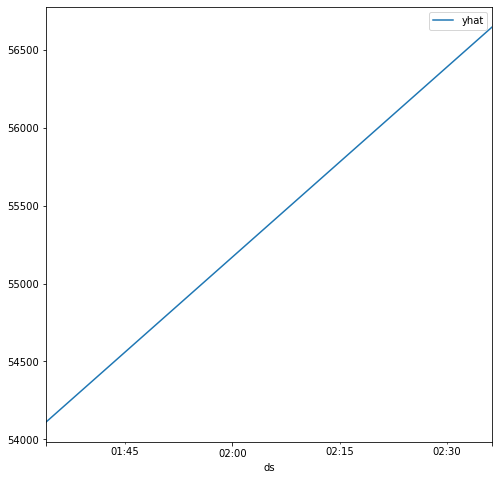

In [36]:
forecast.plot(x="ds",y="yhat",figsize=(8,8))

In [28]:
#plotting the components

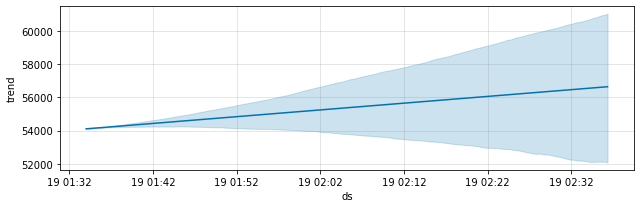

In [37]:
m.plot_components(forecast);

In [29]:
#plotting the previous data and future data

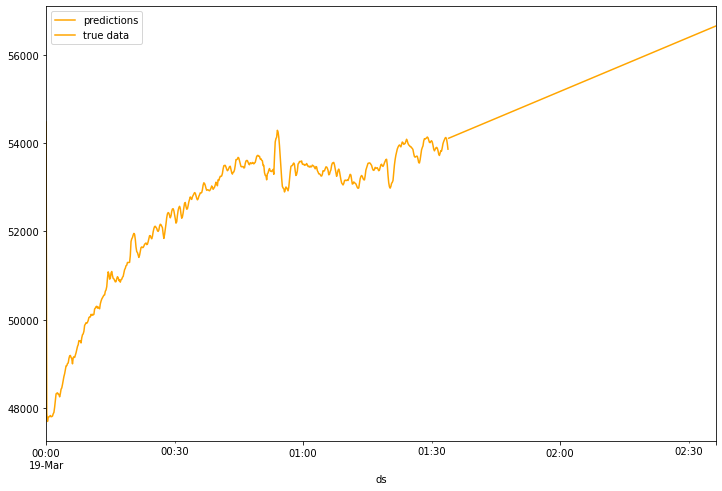

In [44]:
ax = forecast.plot(x="ds",y="yhat",label = "predictions",legend =True,figsize=(12,8))
df1.plot(x="ds",y="y",label="true data",legend=True,ax=ax)